In [3]:
# prompt: read csv from google drive

import pandas as pd

# Replace 'your_file.csv' with the actual path to your CSV file in Google Drive
file_path = 'C:/Users/asus/Downloads/archive/harddrive.csv'

try:
  df = pd.read_csv(file_path)
  print("CSV file read successfully.")
  # You can now work with the DataFrame 'df'
  print(df.head())  # Print the first few rows of the DataFrame
except FileNotFoundError:
  print(f"File not found at: {file_path}")
except Exception as e:
  print(f"An error occurred while reading the CSV file: {e}") 


CSV file read successfully.
         date    serial_number                    model  capacity_bytes  \
0  2016-01-01   MJ0351YNG9Z0XA  Hitachi HDS5C3030ALA630   1.482490e-311   
1  2016-01-01         Z305B2QN              ST4000DM000   1.976651e-311   
2  2016-01-01   MJ0351YNG9Z7LA  Hitachi HDS5C3030ALA630   1.482490e-311   
3  2016-01-01   MJ0351YNGABYAA  Hitachi HDS5C3030ALA630   1.482490e-311   
4  2016-01-01  WD-WMC4N2899475             WDC WD30EFRX   1.482490e-311   

   failure  smart_1_normalized  smart_1_raw  smart_2_normalized  smart_2_raw  \
0        0                 100            0               135.0        108.0   
1        0                 113     54551400                 NaN          NaN   
2        0                 100            0               136.0        104.0   
3        0                 100            0               136.0        104.0   
4        0                 200            0                 NaN          NaN   

   smart_3_normalized  ...  smart_250_no

In [4]:
df["end_date"] = df.groupby("serial_number")["date"].transform("max")
df["end_date"] = pd.to_datetime(df["end_date"])
df["date"] = pd.to_datetime(df["date"])
df["date_diff"] = df["end_date"] - df["date"]
df["date_diff"].describe()

count                       3179295
mean     51 days 17:17:30.845423278
std      47 days 02:07:06.545651932
min                 0 days 00:00:00
25%                12 days 00:00:00
50%                24 days 00:00:00
75%               106 days 00:00:00
max               119 days 00:00:00
Name: date_diff, dtype: object

In [5]:
# prompt: drop column with nulls in each column and print the deleted column name

for column in df.columns:
  if df[column].isnull().any():
    print(f"Dropping column '{column}' due to null values.")
    df.drop(column, axis=1, inplace=True)


Dropping column 'smart_2_normalized' due to null values.
Dropping column 'smart_2_raw' due to null values.
Dropping column 'smart_8_normalized' due to null values.
Dropping column 'smart_8_raw' due to null values.
Dropping column 'smart_11_normalized' due to null values.
Dropping column 'smart_11_raw' due to null values.
Dropping column 'smart_13_normalized' due to null values.
Dropping column 'smart_13_raw' due to null values.
Dropping column 'smart_15_normalized' due to null values.
Dropping column 'smart_15_raw' due to null values.
Dropping column 'smart_22_normalized' due to null values.
Dropping column 'smart_22_raw' due to null values.
Dropping column 'smart_183_normalized' due to null values.
Dropping column 'smart_183_raw' due to null values.
Dropping column 'smart_184_normalized' due to null values.
Dropping column 'smart_184_raw' due to null values.
Dropping column 'smart_187_normalized' due to null values.
Dropping column 'smart_187_raw' due to null values.
Dropping column '

In [10]:
df = df.drop(['date', 'serial_number', 'model','end_date'], axis=1)
df.head()

,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_3_normalized,smart_3_raw,smart_4_normalized,smart_4_raw,smart_5_normalized,smart_5_raw,...,smart_197_normalized,smart_197_raw,smart_198_normalized,smart_198_raw,smart_199_normalized,smart_199_raw,smart_240_raw,smart_241_raw,smart_242_raw,date_diff
0,1.482490e-311,0,100,0,143,540,100,14,100,0,...,100,0,100,0,200,0,0.000000e+00,0.000000e+00,0.000000e+00,119 days
1,1.976651e-311,0,113,54551400,96,0,100,4,100,0,...,100,0,100,0,200,0,1.319155e-321,3.467963e-315,1.316882e-315,119 days
2,1.482490e-311,0,100,0,124,566,100,19,100,0,...,100,0,100,0,200,0,0.000000e+00,0.000000e+00,0.000000e+00,119 days
3,1.482490e-311,0,100,0,137,507,100,15,100,0,...,100,0,100,0,200,0,0.000000e+00,0.000000e+00,0.000000e+00,119 days
4,1.482490e-311,0,200,0,175,6250,100,10,200,0,...,200,0,100,0,200,0,0.000000e+00,0.000000e+00,0.000000e+00,119 days


In [11]:
reduced_df = df.sample(n=10000, random_state=42)  # Sample 1000 rows (adjust as needed)

In [12]:
Y = reduced_df["date_diff"].dt.days
X = reduced_df.drop(["date_diff"],axis=1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Shapes - X_train:", X_train.shape, "X_test:", X_test.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

Shapes - X_train: (8000, 28) X_test: (2000, 28) y_train: (8000,) y_test: (2000,)


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Creating Random Forest Regressor
RF_model = RandomForestRegressor(random_state=1)
RF_model.fit(X_train, y_train)

# Predicting on test data
y_pred_RF = RF_model.predict(X_test)

# Calculating Mean Squared Error
mse_RF = mean_squared_error(y_test, y_pred_RF)
print("Random Forest MSE:", mse_RF)

# Calculating R^2 score
score_RF = RF_model.score(X_test, y_test)
print("Random Forest R^2 score:", score_RF)

Random Forest MSE: 1110.744146188037
Random Forest R^2 score: 0.5048210781678824


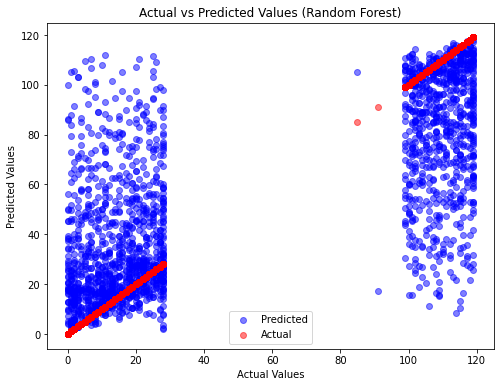

In [14]:
# Visualizing Actual vs Predicted values with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_RF, alpha=0.5, label='Predicted', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVR 

svr = SVR(kernel='linear') 
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test) 

# Calculating Mean Squared Error
mse_svm = mean_squared_error(y_test, y_pred)
print("SVM MSE:", mse_RF)

# Calculating R^2 score
score_svm = svr.score(X_test, y_test)
print("SVM R^2 score:", score_RF)

In [ ]:
# Visualizing Actual vs Predicted values with different colors
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted', color='blue')
plt.scatter(y_test, y_test, alpha=0.5, label='Actual', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVM)')
plt.legend()
plt.show()